# Rice type classification using machine learning algorithm(Random Forest Classifier)

In [4]:
# Importing Libraries
%matplotlib inline
#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

#Data processing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Machine model Algorithm module
from sklearn.ensemble import RandomForestClassifier

#Performance metrics
from sklearn.metrics import mean_squared_error,confusion_matrix,roc_auc_score,RocCurveDisplay,auc,roc_curve
from sklearn.metrics import precision_recall_fscore_support,ConfusionMatrixDisplay,log_loss,accuracy_score,f1_score

In [5]:
# Visualization of Tree Libraries
import graphviz
from sklearn.tree import export_graphviz
#If this cell doesn't Run ignore

Converting the .arff file to csv

In [6]:
from scipy.io import arff
import pandas as pd

# Load the file
data, meta = arff.loadarff('Rice_Cammeo_Osmancik.arff')

# Convert to DataFrame
df = pd.DataFrame(data)

# Decode byte strings if needed
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Save as CSV
df.to_csv('converted_rice_data.csv', index=False)

print("Conversion complete! CSV file saved as 'converted_rice_data.csv'")


Conversion complete! CSV file saved as 'converted_rice_data.csv'


/tmp/ipython-input-6-2975910064.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)


Reading Dataset

In [7]:
df = pd.read_csv("converted_rice_data.csv")
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231.0,525.578979,229.749878,85.093788,0.928882,15617.0,0.572896,Cammeo
1,14656.0,494.311005,206.020065,91.730972,0.895405,15072.0,0.615436,Cammeo
2,14634.0,501.122009,214.106781,87.768288,0.912118,14954.0,0.693259,Cammeo
3,13176.0,458.342987,193.337387,87.448395,0.891861,13368.0,0.640669,Cammeo
4,14688.0,507.166992,211.743378,89.312454,0.906691,15262.0,0.646024,Cammeo


In [8]:
df.tail()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
3805,11441.0,415.858002,170.486771,85.756592,0.864280,11628.0,0.681012,Osmancik
3806,11625.0,421.390015,167.714798,89.462570,0.845850,11904.0,0.694279,Osmancik
3807,12437.0,442.498993,183.572922,86.801979,0.881144,12645.0,0.626739,Osmancik
3808,9882.0,392.296997,161.193985,78.210480,0.874406,10097.0,0.659064,Osmancik
3809,11434.0,404.709991,161.079269,90.868195,0.825692,11591.0,0.802949,Osmancik


Unique values in the column CLASS

In [9]:
df['Class'].unique() #Two Rice Types 'Cammeo', 'Osmancik'

array(['Cammeo', 'Osmancik'], dtype=object)

In [10]:
for i in range(len(df['Class'])):
    if(df.iloc[i,7]!='Cammeo'):
        print(df.iloc[i,7],i)
        break                          #Osmancik Rice type features Starts at 1630 in dataset

Osmancik 1630


Range of Cammeo (0,1629), Range of Osmancik (1630,3810)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   float64
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   float64
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(7), object(1)
memory usage: 238.3+ KB



Missing Values in Dataset

In [12]:
True in df.isnull() #checks missing values
#Missing values are NONE

False

Missing values are NONE

In [13]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144753,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


Class Distribution Plot

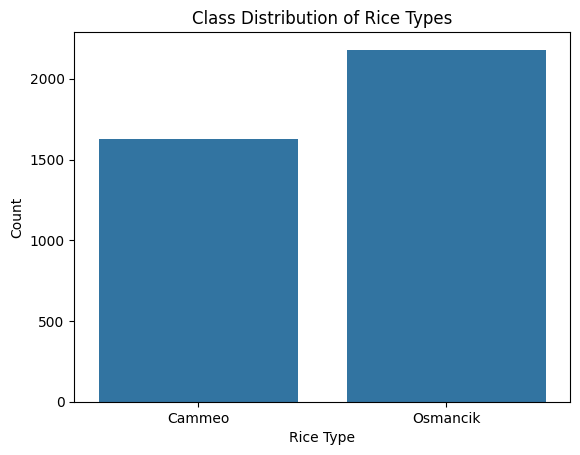

In [14]:
# Visualize class distribution
sns.countplot(x='Class', data=df)
plt.title("Class Distribution of Rice Types")
plt.xlabel("Rice Type")
plt.ylabel("Count")
plt.show()


Corelation among features

In [15]:
df.drop('Class', axis=1).corr()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
Area,1.000000,0.966453,0.903015,0.787840,0.352095,0.998939,-0.061184
Perimeter,0.966453,1.000000,0.971884,0.629828,0.544601,0.969937,-0.130923
Major_Axis_Length,0.903015,0.971884,1.000000,0.452092,0.710897,0.903381,-0.139562
Minor_Axis_Length,0.787840,0.629828,0.452092,1.000000,-0.291683,0.787318,0.063366
Eccentricity,0.352095,0.544601,0.710897,-0.291683,1.000000,0.352716,-0.198580
Convex_Area,0.998939,0.969937,0.903381,0.787318,0.352716,1.000000,-0.065826
Extent,-0.061184,-0.130923,-0.139562,0.063366,-0.198580,-0.065826,1.000000


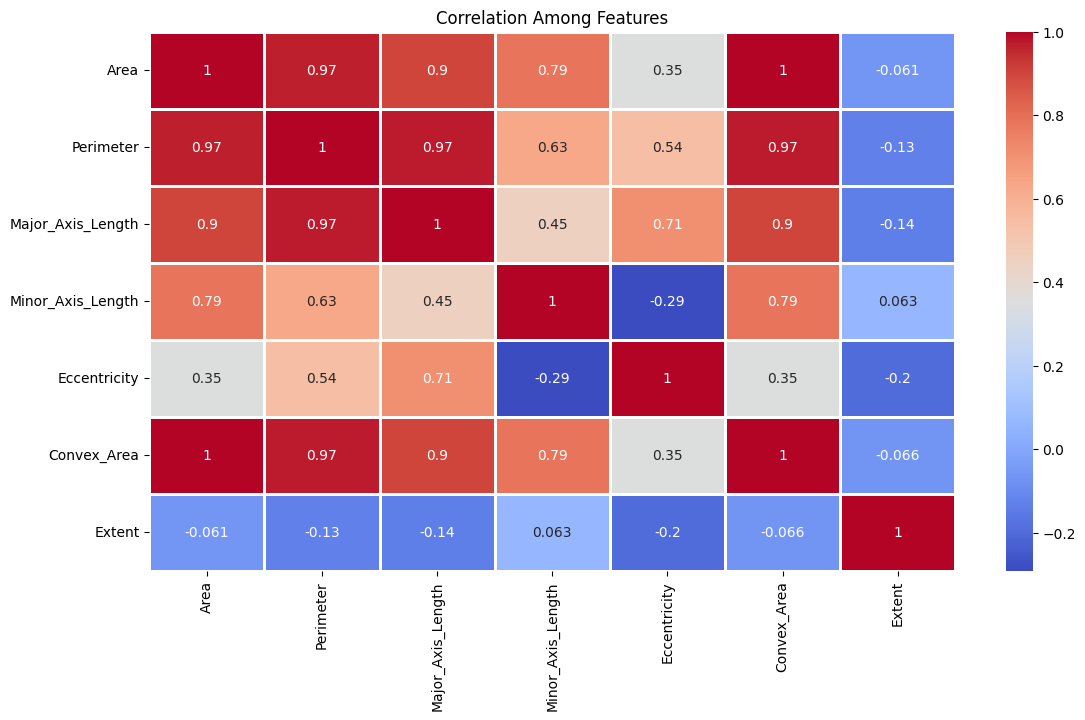

In [16]:
plt.figure(figsize=(13,7))
plt.title("Correlation Among Features")
sns.heatmap(df.drop('Class', axis=1).corr(),cmap='coolwarm',linewidths=1,annot=True)
plt.show()

Negative Correlation among:

ECCENTRICITY VS EXTENT,MINORAXIS
EXTENT VS ECCENTRICITY, MAJORAXIS, MINORAXIS, PERIMETER, AREA, CONVEX_AREA

Negative Correlation among:

ECCENTRICITY VS EXTENT,MINORAXIS
EXTENT VS ECCENTRICITY, MAJORAXIS, MINORAXIS, PERIMETER, AREA, CONVEX_AREA

Boxplots for Feature Distributions by Class

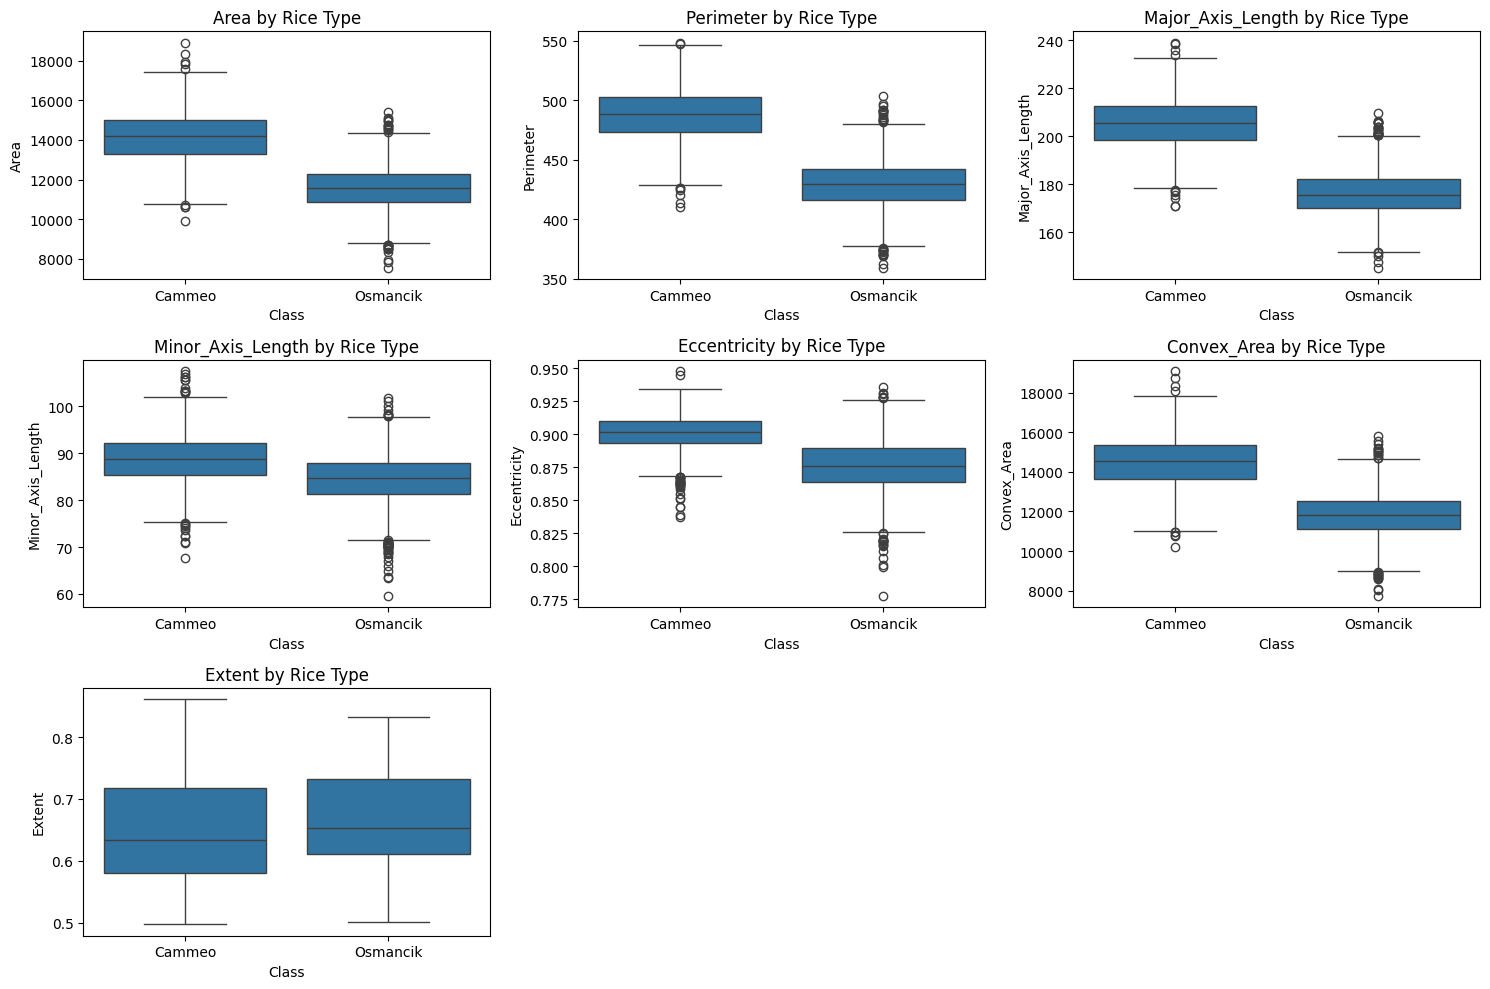

In [17]:
# Boxplot of features grouped by Class
feature_cols = df.columns[:-1]  # exclude 'Class'
plt.figure(figsize=(15, 10))
for i, col in enumerate(feature_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Class', y=col, data=df)
    plt.title(f'{col} by Rice Type')
    plt.tight_layout()
plt.show()


In [18]:
# Features of Cammeo
df.loc[df['Class']=='Cammeo'].describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000,1630.000000
mean,14162.892025,487.438942,205.478589,88.767532,0.901047,14494.426994,0.651420
std,1286.770521,22.181518,10.333854,5.350244,0.013381,1309.418680,0.082197
min,9908.000000,410.506012,170.781647,67.695343,0.837433,10205.000000,0.497413
25%,13289.250000,473.090248,198.580872,85.376022,0.893274,13620.250000,0.580921
50%,14212.000000,488.179504,205.716743,88.830879,0.901759,14536.500000,0.634436
75%,14997.000000,502.637756,212.433681,92.127367,0.909835,15361.000000,0.717667
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


In [19]:
# Features of Osmancik
df.loc[df['Class']=='Osmancik'].describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000,2180.000000
mean,11549.783486,429.415505,176.287755,84.479042,0.876271,11799.585780,0.669796
std,1041.908607,20.154394,9.362405,5.302667,0.018999,1062.804346,0.072340
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.501078
25%,10850.500000,416.207993,169.989491,81.333870,0.863816,11097.000000,0.610567
50%,11552.500000,429.239502,175.665390,84.633549,0.876206,11813.500000,0.652695
75%,12269.000000,442.506744,182.099850,87.932961,0.889286,12524.000000,0.732591
max,15420.000000,503.459991,209.651169,101.762260,0.935528,15800.000000,0.832747



Graphs for each Feature

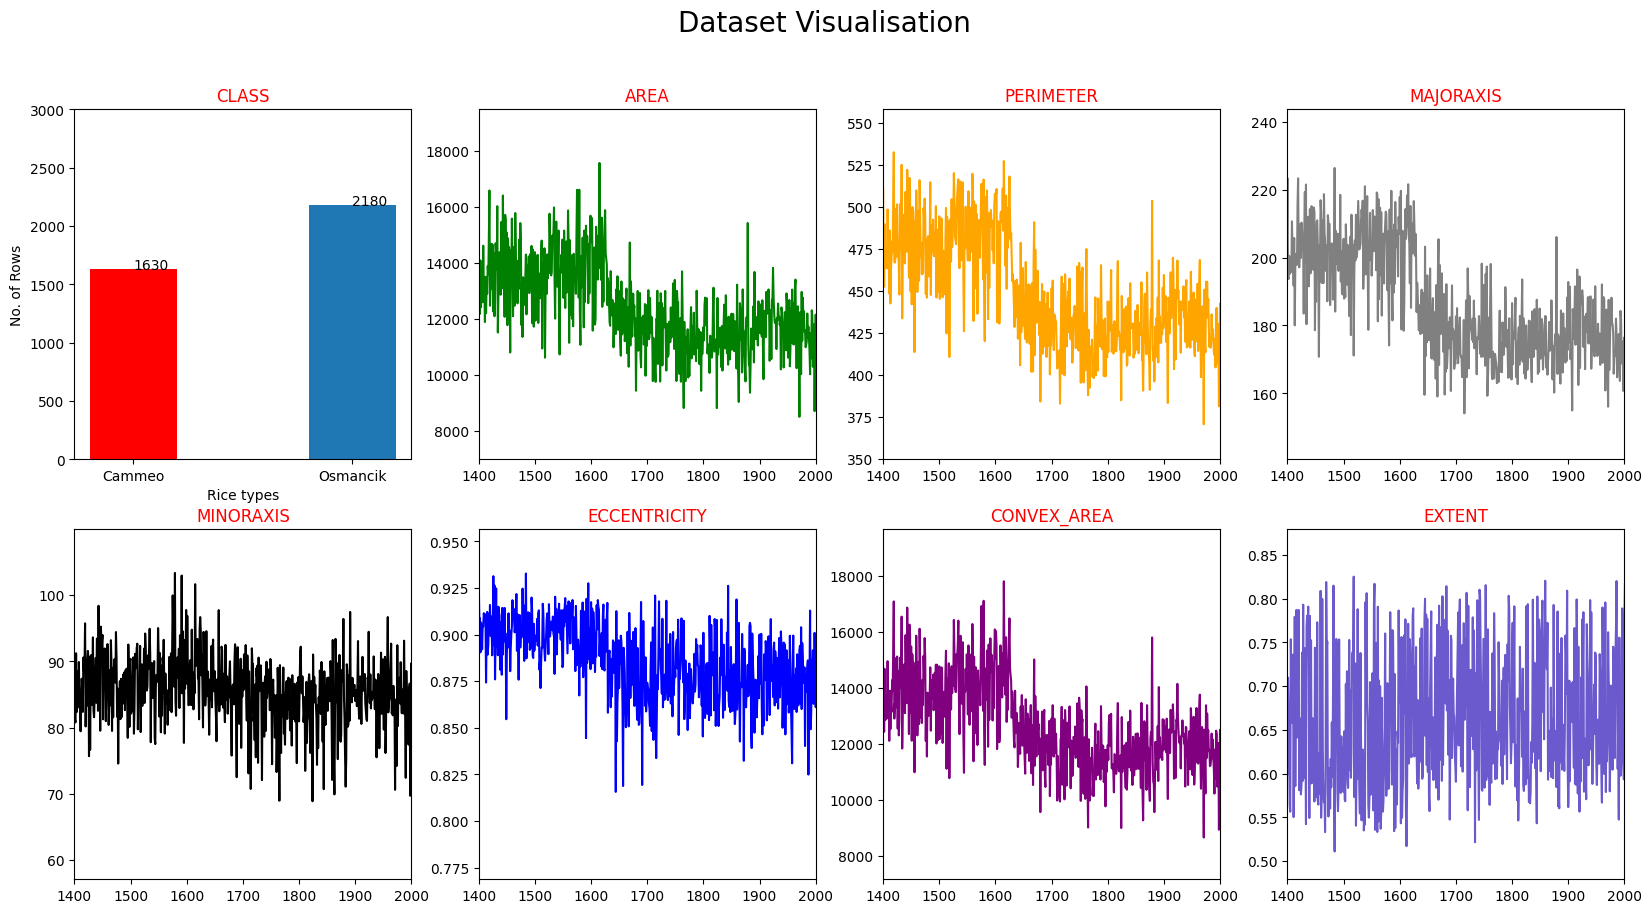

In [20]:
barx=[len([0 for i in df['Class'] if(i=='Cammeo')]),len([1 for i in df['Class'] if(i=='Osmancik')])]
bary=['Cammeo','Osmancik']
plt.figure(figsize=(20,10))
plt.suptitle('Dataset Visualisation',size='20')
plt.subplot(2, 4, 1)
plt.title('CLASS',color='r')
plt.bar(bary,barx,0.4,color=['r','tab:blue'])
plt.xlabel('Rice types')
plt.ylabel('No. of Rows')
plt.text(0,barx[0],barx[0])
plt.text(1,barx[1],barx[1])
plt.ylim([0,3000])
plt.subplot(2, 4, 2)
plt.title('AREA',color='r')
plt.plot(df['Area'],color='Green')
plt.xlim([1400,2000])
plt.subplot(2, 4, 3)
plt.title('PERIMETER',color='r')
plt.xlim([1400,2000])
plt.plot(df['Perimeter'],color='Orange')
plt.subplot(2, 4, 4)
plt.title('MAJORAXIS',color='r')
plt.xlim([1400,2000])
plt.plot(df['Major_Axis_Length'],color='grey')
plt.subplot(2, 4, 5)
plt.title('MINORAXIS',color='r')
plt.xlim([1400,2000])
plt.plot(df['Minor_Axis_Length'],color='k')
plt.subplot(2, 4, 6)
plt.title('ECCENTRICITY',color='r')
plt.xlim([1400,2000])
plt.plot(df['Eccentricity'],color='blue')
plt.subplot(2, 4, 7)
plt.title('CONVEX_AREA',color='r')
plt.xlim([1400,2000])
plt.plot(df['Convex_Area'],color='purple')
plt.subplot(2, 4, 8)
plt.title('EXTENT',color='r')
plt.xlim([1400,2000])
plt.plot(df['Extent'],color='slateblue')
plt.show()

Except EXTENT feature every feature has some significant difference b/w two rice types

Two rice types varies in Range(min,max) values of features.

Note : After 1630 values Cammeo ends and Osmancik values begins in dataset

AREA: data range(1400,2000)
PERIMETER: data range(1400,2000)
MAJORAXIS: data range(1400,2000)
MINORAXIS: data range(1400,2000)
ECCENTRICITY: data range(1400,2000)
CONVEX_AREA: data range(1400,2000)
EXTENT: data range(1400,2000)

Feature vs. Feature graphs

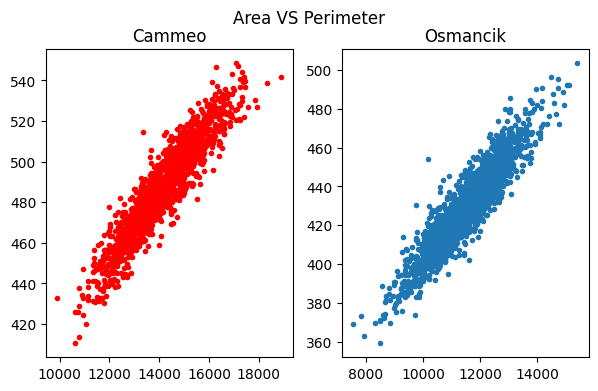

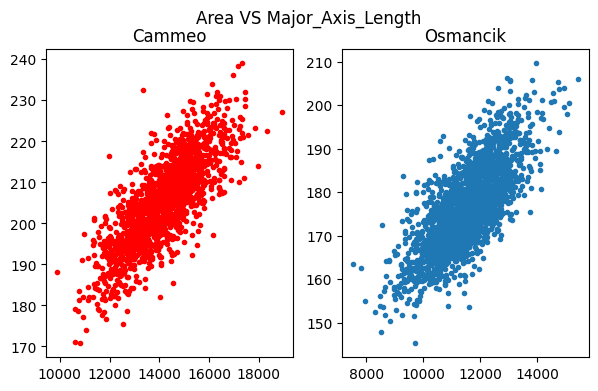

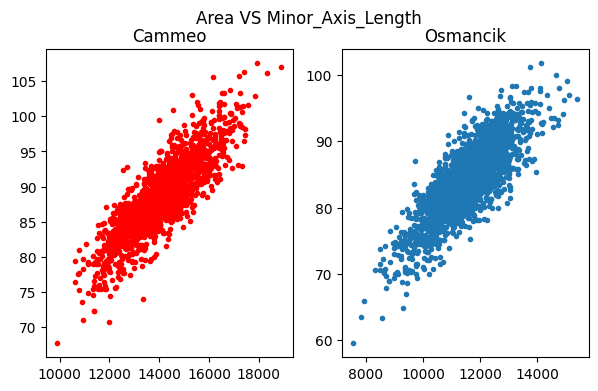

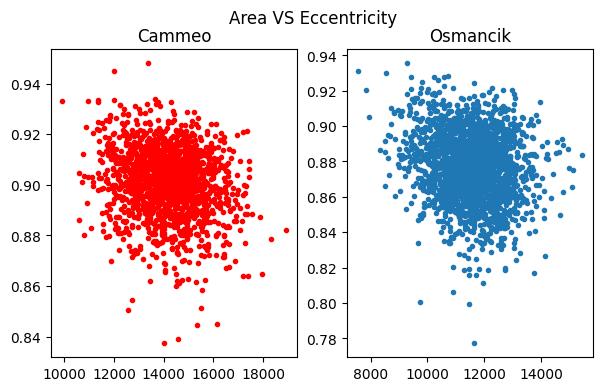

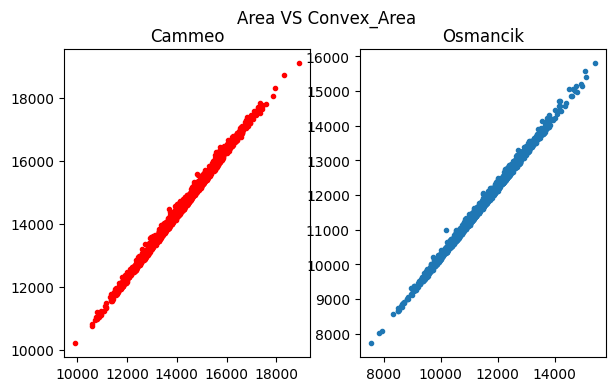

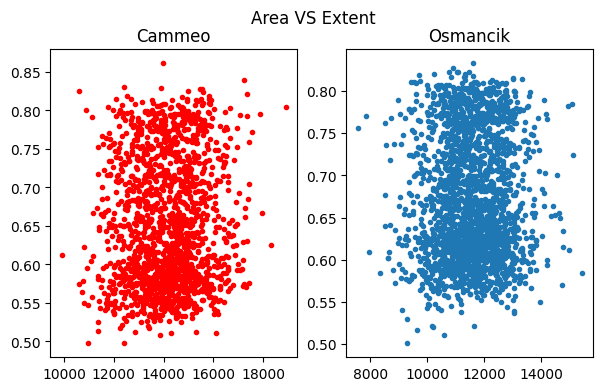

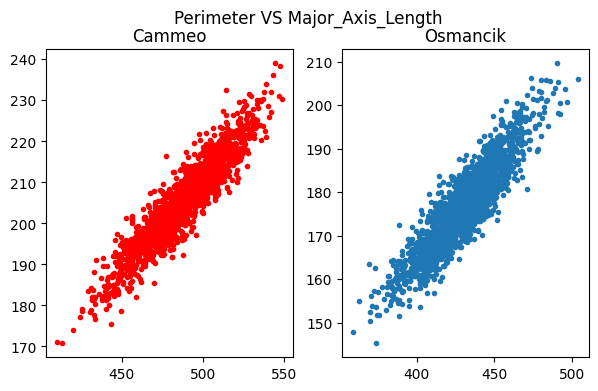

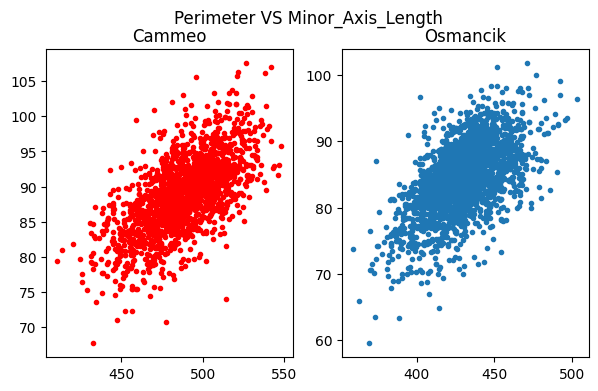

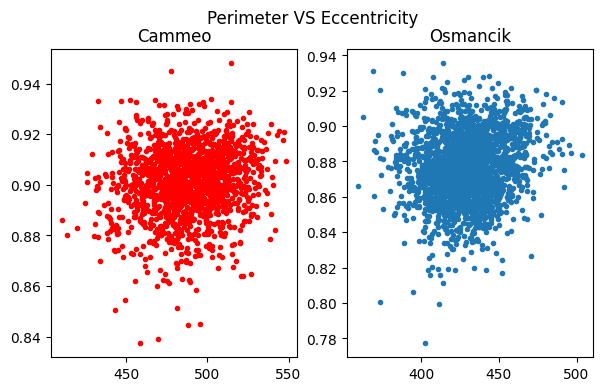

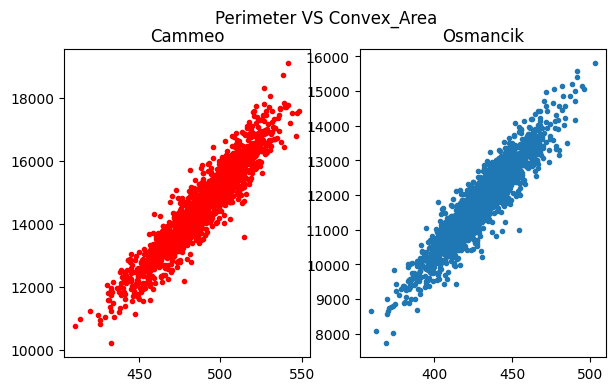

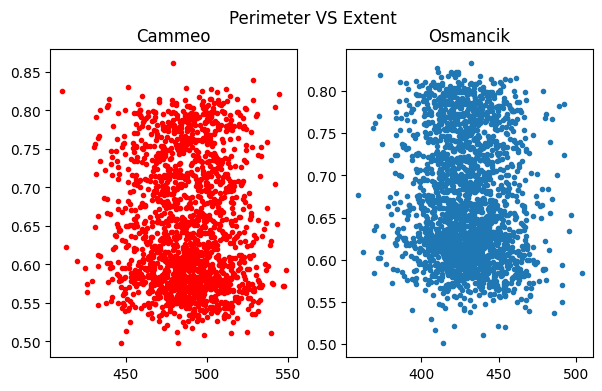

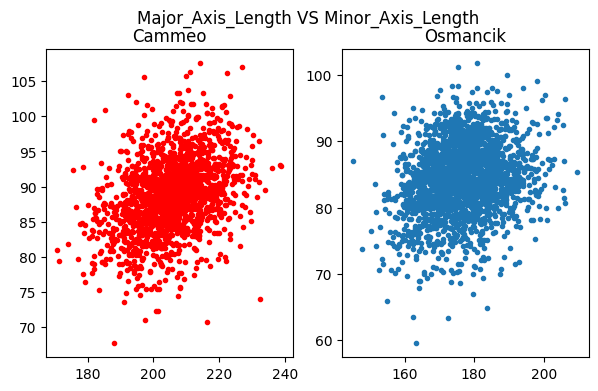

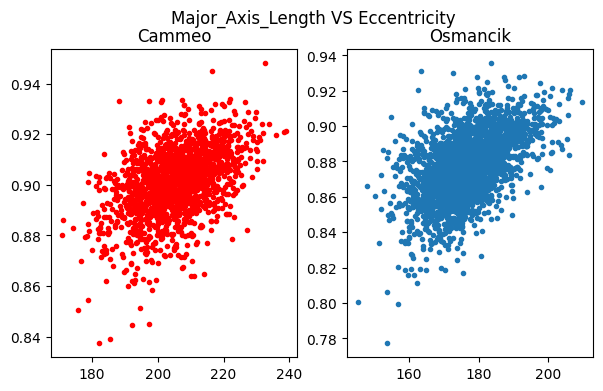

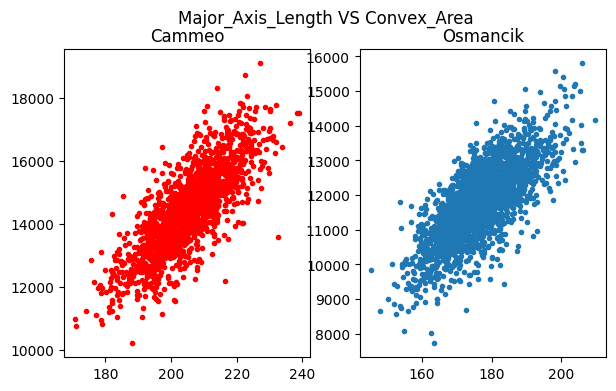

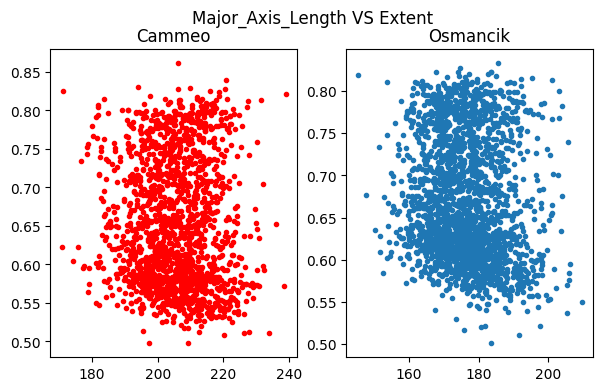

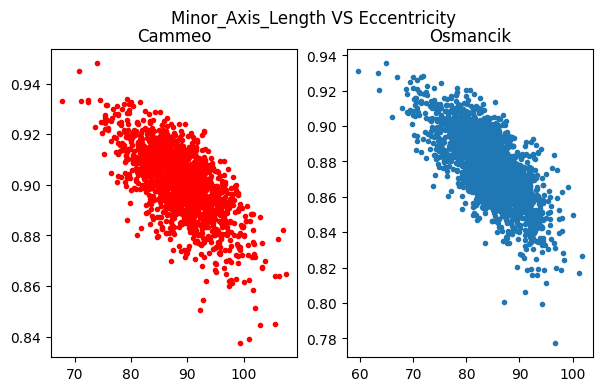

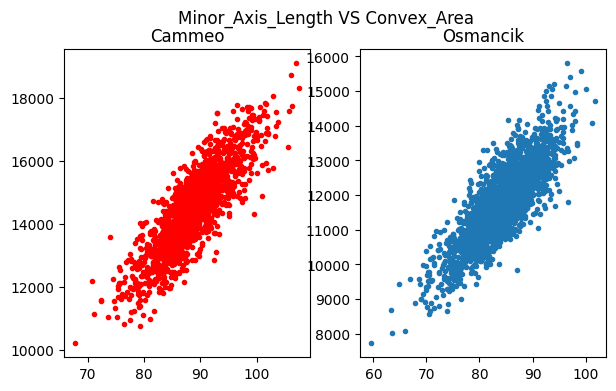

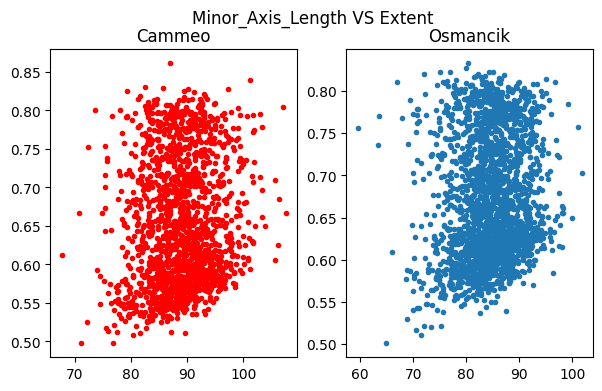

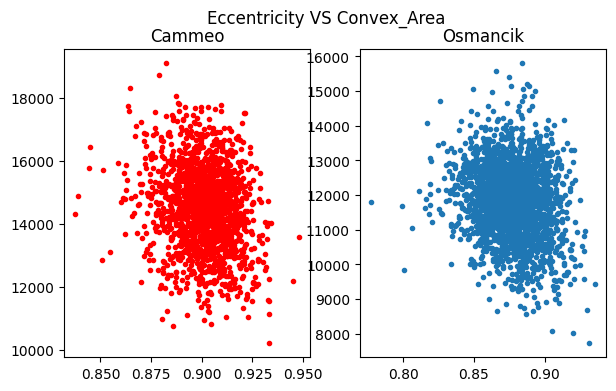

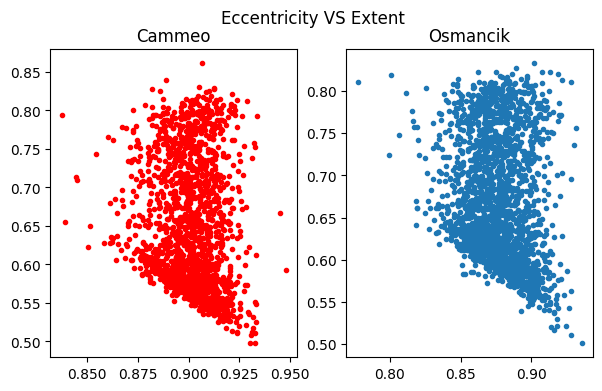

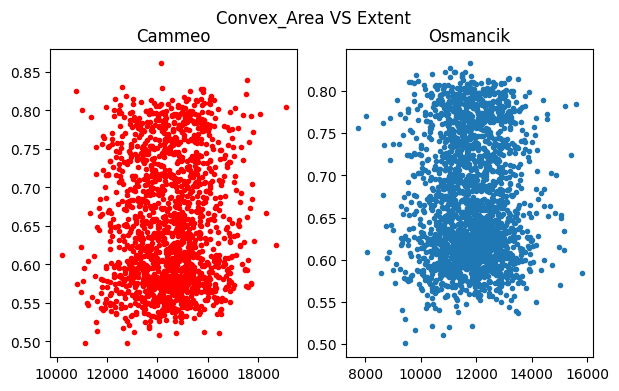

In [21]:
for i in range(7):
    for j in range(i,7):
        if(i!=j):
            plt.figure(figsize=(7,4))
            plt.subplot(1,2,1)
            plt.suptitle(df.columns.values[i]+" VS "+df.columns.values[j])
            plt.title('Cammeo')
            plt.scatter(df.iloc[:1630,i],df.iloc[:1630,j],color='Red',marker='.')
            plt.subplot(1,2,2)
            plt.title('Osmancik')
            plt.scatter(df.iloc[1630:,i],df.iloc[1630:,j],color='tab:blue',marker='.')
    plt.show()

Every feature vs feature graph is similar because of similar structure of Rice

The significant difference of Range b/w two rice types helps to predict their classification with Random Forest Algorithm


Prediction Class

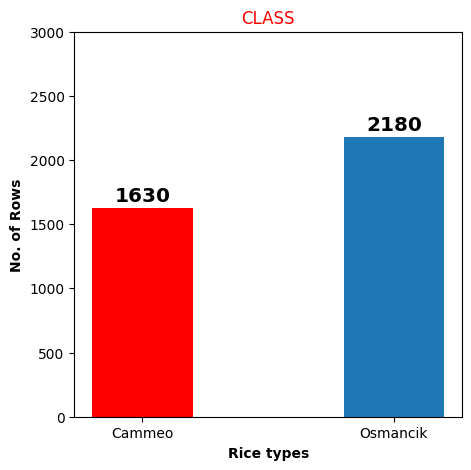

In [22]:
plt.figure(figsize=(5,5))  #No. of rows for each type of rice
plt.bar(bary,barx,0.4,color=['r','tab:blue'])
plt.title('CLASS',color='r')
plt.xlabel('Rice types',weight='bold')
plt.ylabel('No. of Rows',weight='bold')
plt.text(0,barx[0]+50,barx[0],size='x-large',ha='center',weight='bold')
plt.text(1,barx[1]+50,barx[1],size='x-large',ha='center',weight='bold')
plt.ylim([0,3000])
plt.show()

**Data Processing and Analyisis**

Since the we need to Predict categorical data and it is the Binary classification we can convert rice types to 0 and 1.

Cammeo=0, Osmancik=1

In [23]:
x=df.loc[:,df.columns!='Class']                       #all columns except CLASS column
y=df['Class']                                         #CLASS cloumn
y.head()

,Class
0,Cammeo
1,Cammeo
2,Cammeo
3,Cammeo
4,Cammeo


As we can see prediction column has categorical data with object data type

**Label Encoding**

Label Encoder encodes the categorical data target labels with value between 0 and n_classes-1.

Since we have two unique types Label encoder replaces string values to 0 and 1 for binary computation

In [24]:
LE = LabelEncoder()
y= LE.fit_transform(y) #Cammeo=0, Osmancik=1
y

array([0, 0, 0, ..., 1, 1, 1])

**Random Forest Classifier Training and Testing**

A Random Forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.


**Best model Function**

Best model tests with different range of hyper parameters which returns best parameters where f1 score is Higher(Higher is better)

Due to the two loops in best model function it takes long time to execute code but at the end we get the Best results

In [25]:
def bestmodel(x_train, y_train, x_test, y_test):
    def ele(v):
        return v[2]  # Sort by F1-score

    results = []

    for i in range(1, 11):  # max_depth
        for j in range(10, 0, -1):  # min_samples_leaf
            model = RandomForestClassifier(
                n_estimators=100,
                bootstrap=True,
                max_depth=i,
                min_samples_leaf=j,
                random_state=12
            )
            rf_train = model.fit(x_train, y_train)

            preds = rf_train.predict(x_test)
            f2 = f1_score(y_test, preds)
            lgls = log_loss(y_test, rf_train.predict_proba(x_test))
            rac = roc_auc_score(y_test, preds)
            acc = accuracy_score(y_test, preds)

            results.append([i, j, f2, lgls, rac, acc])

    # Sort by F1 score descending
    results.sort(key=ele, reverse=True)
    best = results[0]
    print("Best hyperparameters: max_depth =", best[0], ", min_samples_leaf =", best[1])
    print("F1 Score:", best[2], " | Log Loss:", best[3], " | ROC-AUC:", best[4], " | Accuracy:", best[5])

    # Retrain best model and save it
    best_model = RandomForestClassifier(
        n_estimators=100,
        bootstrap=True,
        max_depth=best[0],
        min_samples_leaf=best[1],
        random_state=12
    )
    best_model.fit(x_train, y_train)
    joblib.dump(best_model, "model.pkl")
    print("Saved best model as model.pkl")

# -------------------------------
# Run for different test sizes
# -------------------------------


In [26]:
for i in np.arange(0.1, 0.6, 0.1):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, shuffle=True, random_state=12)
    print("\n============================")
    print(f"Test Size: {i}")
    bestmodel(x_train, y_train, x_test, y_test)


Test Size: 0.1
Best hyperparameters: max_depth = 10 , min_samples_leaf = 10
F1 Score: 0.9452054794520548  | Log Loss: 0.1776740031023016  | ROC-AUC: 0.9362930547713156  | Accuracy: 0.937007874015748
Saved best model as model.pkl

Test Size: 0.2
Best hyperparameters: max_depth = 6 , min_samples_leaf = 10
F1 Score: 0.9488888888888889  | Log Loss: 0.16801913108183944  | ROC-AUC: 0.9380226862777251  | Accuracy: 0.9396325459317585
Saved best model as model.pkl

Test Size: 0.30000000000000004
Best hyperparameters: max_depth = 7 , min_samples_leaf = 10
F1 Score: 0.9461254612546125  | Log Loss: 0.1785540349457914  | ROC-AUC: 0.932442998385795  | Accuracy: 0.9361888111888111
Saved best model as model.pkl

Test Size: 0.4
Best hyperparameters: max_depth = 10 , min_samples_leaf = 8
F1 Score: 0.9414389291689905  | Log Loss: 0.20651627970907  | ROC-AUC: 0.9276273349165279  | Accuracy: 0.9311023622047244
Saved best model as model.pkl

Test Size: 0.5
Best hyperparameters: max_depth = 5 , min_samples_

Random Forest Best model Results

Spliting dataset according test size we got from best model

**Random Forest Model**

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True,random_state=12)

In [28]:
model=RandomForestClassifier(n_estimators=100, bootstrap=True, max_depth=6, min_samples_leaf=10, random_state=12)
rf_train=model.fit(x_train,y_train)
rf_train

,n_estimators,100
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [29]:
RandomForestClassifier(max_depth=6, min_samples_leaf=10, random_state=12)

,n_estimators,100
,criterion,'gini'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:
print("Training Accuracy Score : ",accuracy_score(y_train,rf_train.predict(x_train))*100,"%")

Training Accuracy Score :  93.47112860892388 %


In [31]:
# Visualize Feature Importances from Random Forest
importances = rf_train.feature_importances_
feature_names = x_train.columns  # assuming x_train is a DataFrame

In [32]:
# Create a DataFrame to sort feature importances
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

/tmp/ipython-input-33-1911338308.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')


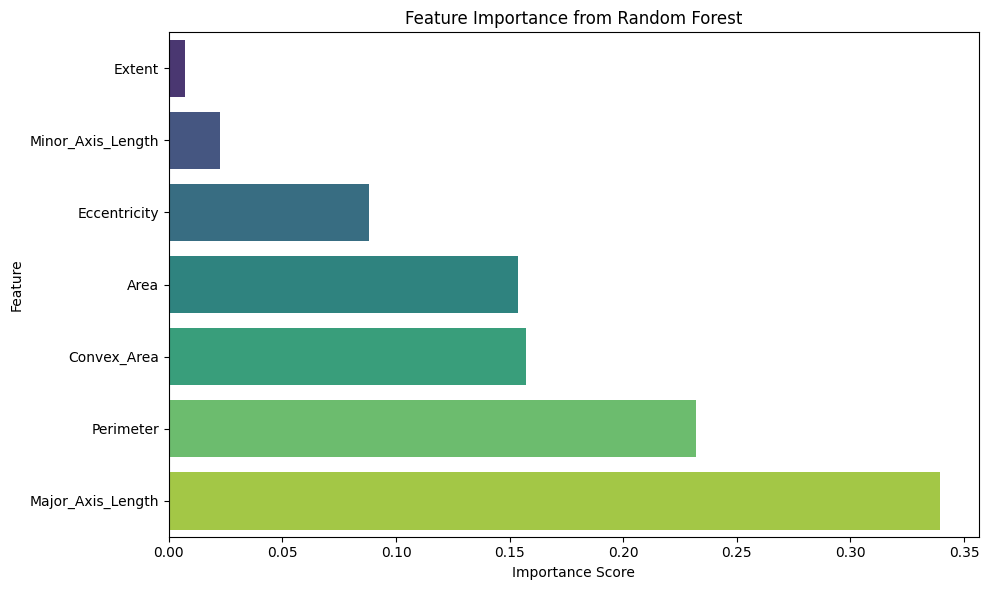

In [33]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


**Performance Metrics**

Possible Performance metrics for classification problem are

Confusion Matrix

F1score (balances the precision and recall)

Log loss

Accuracy score

ROC curve

ROC-AUC score(Area Under Curve in ROC Graph)

**Confusion Matrix**

A confusion matrix is a technique for summarizing the performance of a classification algorithm

It is a table with 4 different combinations of predicted and actual values. 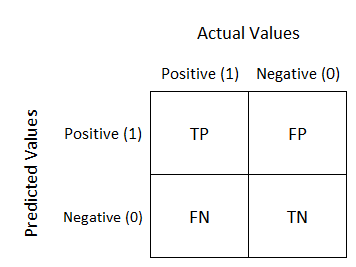

In [34]:
confusion_matrix(y_test,rf_train.predict(x_test))

array([[289,  22],
       [ 24, 427]])

In [35]:
print(list(y_test),list(rf_train.predict(x_test)))

[np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(1), np.int64(1), np.int64(0), np.int64(0), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(0), np.int64(1), np.int64(0), np.int64(1), np.int64(0), np.int64(1)

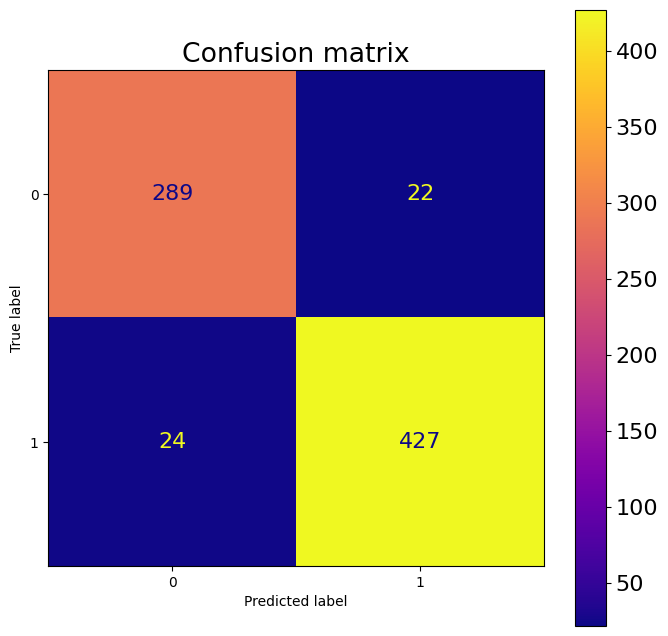

In [36]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.rcParams.update({'font.size': 16})
ConfusionMatrixDisplay.from_estimator(rf_train,x_test,y_test,cmap='plasma',ax=ax)
plt.title('Confusion matrix')
plt.savefig('confusion_matrix.jpg')
plt.show()

**Precision, Recall, and F-1 Score**

Precision is the fraction of the correctly classified instances from the total classified instances.

Recall is the fraction of the correctly classified instances from the total classified instances.

Precision and recall are given as follows

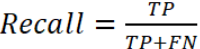

The F1 score can be interpreted as a weighted average of the precision and recall.

F1 score reaches its best value at 1 and worst score at 0.
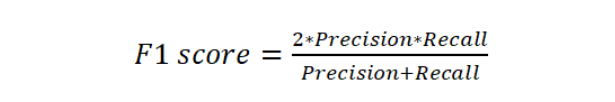


In [37]:
print("F1-score : ",f1_score(y_test,rf_train.predict(x_test)))#F1_score balances the percision and recall from confusion matrix

F1-score :  0.9488888888888889


In [38]:
print("precision, recall, fscore, support :",precision_recall_fscore_support(y_test,rf_train.predict(x_test),average ='binary'))

precision, recall, fscore, support : (0.9510022271714922, 0.9467849223946785, 0.9488888888888889, None)


**Log loss**

Logarithmic loss (or log loss) measures the performance of a classification model where the prediction is a probability value between 0 and 1.

Log loss increases as the predicted probability diverge from the actual label.

Lower the log-loss value, better are the predictions of the model.
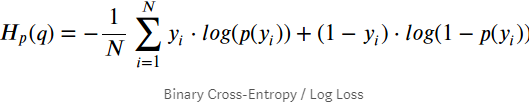

In [39]:
print("Log Loss :",log_loss(y_test, rf_train.predict_proba(x_test)))

Log Loss : 0.16801913108183944


**Accuracy Score**

In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

It ranges from 0 to 1, where 0 is Worst and 1 is Best

Its is often multipled with 100 to get accuracy percentage.

In [40]:
print("Testing Accuracy Score : ",accuracy_score(y_test, rf_train.predict(x_test))*100,"%") #Accuracy of prediction in %

Testing Accuracy Score :  93.96325459317585 %


**ROC AUC score**

Tt is used to find Area Under Curve(AUC) in ROC graph.

It ranges from 0 to 1, where 0 is Worst and 1 is Best

In [41]:
roc_auc_score(y_test, rf_train.predict(x_test))

0.9380226862777251

Results

Random_state	Test_size	max_depth	min_samples_leaf	Confusion matrix	F1score	Log_loss	Roc_Auc_score	Accuracy
12	0.2	6	10
289	22
24	427
0.9488	0.16801	0.94	93.96%



**Observations**

Plotting no. of decision trees vs LogLoss

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2742: U

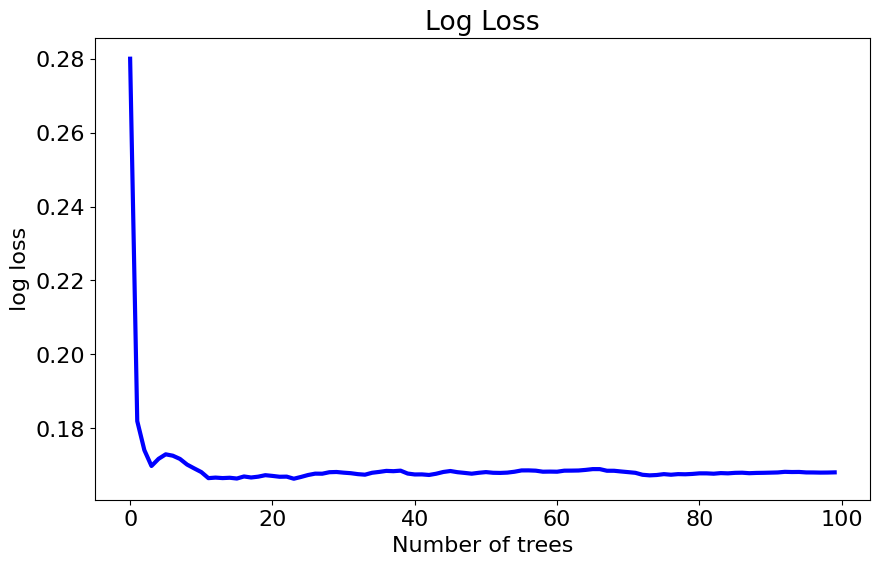

In [42]:
preds = np.stack([t.predict_proba(x_test) for t in rf_train.estimators_])
lgls=[log_loss(y_test,np.mean(preds[:i+1], axis=0)) for i in range(100)]
plt.figure(figsize=(10,6))
plt.plot(lgls,color='b',linewidth=3)
plt.xlabel('Number of trees')
plt.ylabel('log loss')
plt.title('Log Loss')
plt.show()

Number Decision trees increases in model,log-loss decreases

**Plotting ROC curve for True Positives VS False Positives**

ROC=Compute Receiver Operating Characteristic.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/_plotting.py:379: FutureWarning: `estimator_name` is deprecated in 1.7 and will be removed in 1.9. Use `name` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_plotting.py:175: FutureWarning: `**kwargs` is deprecated and will be removed in 1.9. Pass all matplotlib arguments to `curve_kwargs` as a dictionary instead.
  warnings.warn(


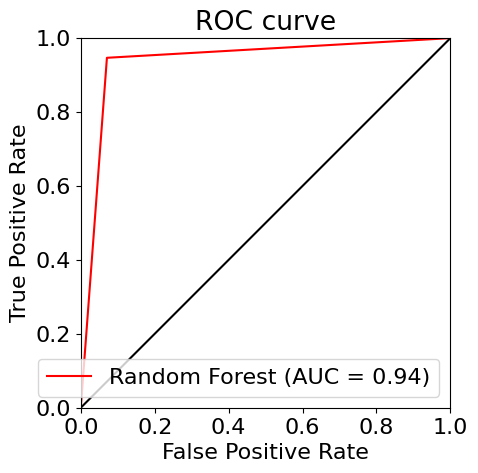

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, rf_train.predict(x_test))
roc_auc = auc(fpr, tpr)
display =RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Random Forest')
display.plot(color='r')
plt.plot(list(np.arange(0,2,0.1)),list(np.arange(0,2,0.1)),color='k')
plt.title('ROC curve')
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

**Sample Decision tree in Random forest model**

Visualizing first Decision tree in Random Forest ensemble model

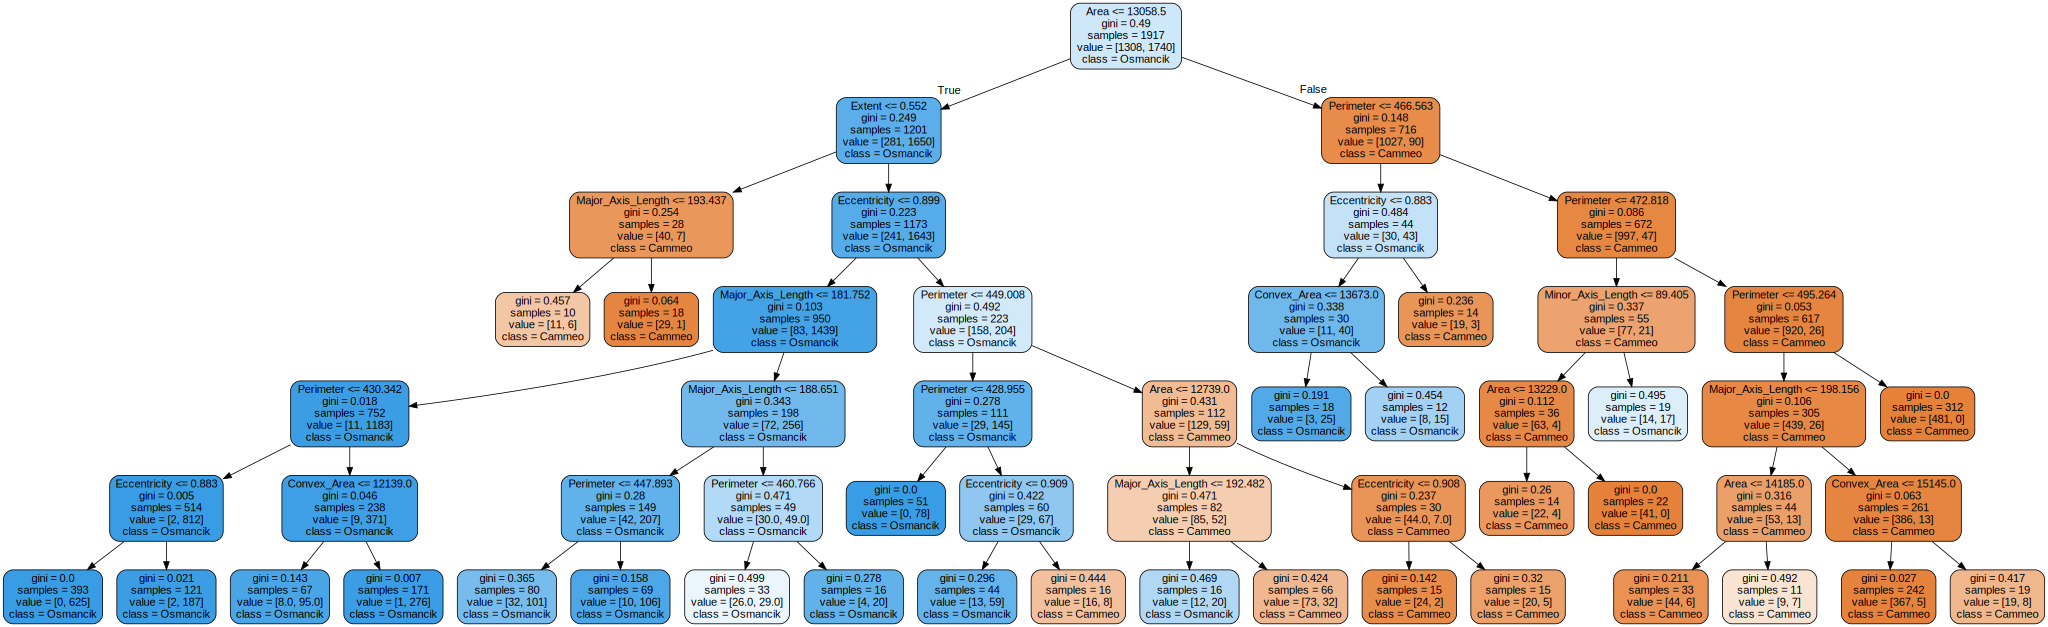

In [44]:
#visualise in one of the decision tree in random forest with best Hyper parameters
dot_data = export_graphviz(rf_train.estimators_[0],
                           feature_names=x.columns.values,
                           class_names=['Cammeo','Osmancik'],
                           filled=True, impurity=True,
                           rounded=True)

graph = graphviz.Source(dot_data, format='png')
graph.render('figure_name')
graph

**Details**

Dataset : converted_rice_data.csv

Algorithm : Random Forest

Problem Type: Classification

##  Conclusion

This project successfully demonstrated the use of machine learning for classifying rice types based on their morphological features. Several classification models were evaluated, with the Random Forest Classifier achieving the highest accuracy (92%) and ROC-AUC (0.96).

The Random Forest model not only outperformed traditional models like Logistic Regression and SVM but also provided interpretability through feature importance and decision tree visualization. This solution supports the goal of automating grain classification, improving efficiency, and ensuring food quality and safety in agricultural processing.

Future enhancements may include multi-class classification, deep learning approaches, and real-time deployment using web or mobile applications.
